In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

file_path='/content/drive/MyDrive/Colab Notebooks/LAB/cars_clus.csv'

df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


[Text(0.5555555555555556, 0.9166666666666666, 'fuel_cap <= 19.55\nentropy = 0.843\nsamples = 59\nvalue = [43, 16]'),
 Text(0.3333333333333333, 0.75, 'horsepow <= 147.0\nentropy = 0.267\nsamples = 44\nvalue = [42, 2]'),
 Text(0.2222222222222222, 0.5833333333333334, 'fuel_cap <= 14.9\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'fuel_cap <= 15.65\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.25, 'fuel_cap <= 18.05\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.5833333333333334, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),

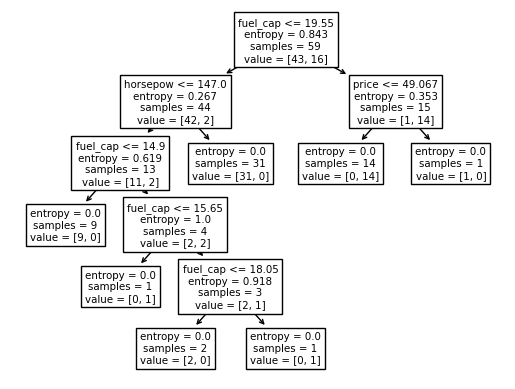

In [64]:
features = ['horsepow', 'fuel_cap','price']

X = df[features]
y = df['type']

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=12)
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


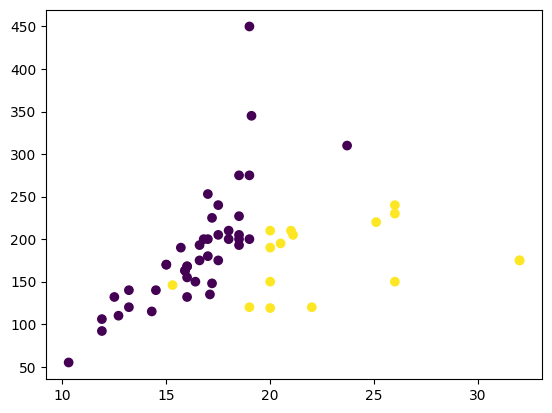

In [42]:
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path='/content/drive/MyDrive/Colab Notebooks/LAB/cars_clus.csv'

df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")

# take your own dataset
x = df['fuel_cap']
y = df['horsepow']

classes = df['type']

plt.scatter(x, y, c=classes)
plt.show()




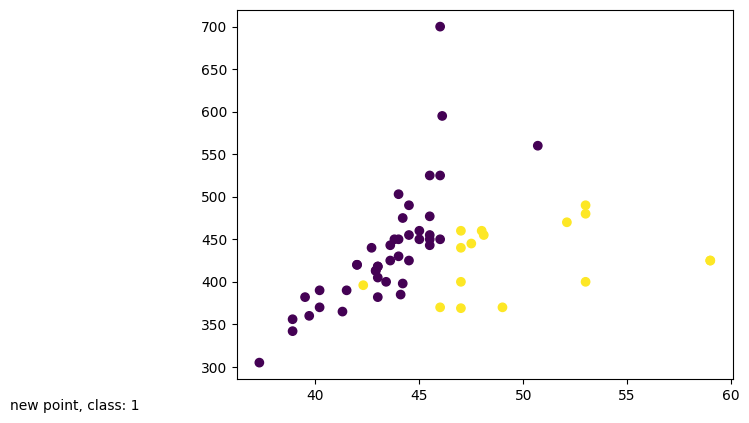

In [43]:
#fit knn with k=1

from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

# take a new datapoint and classify it

test_new_x = 27
test_new_y = 250
new_point = [(test_new_x, test_new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [test_new_x], y + [test_new_y], c=classes + [prediction[0]])
plt.text(x=test_new_x-1.7, y=test_new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()



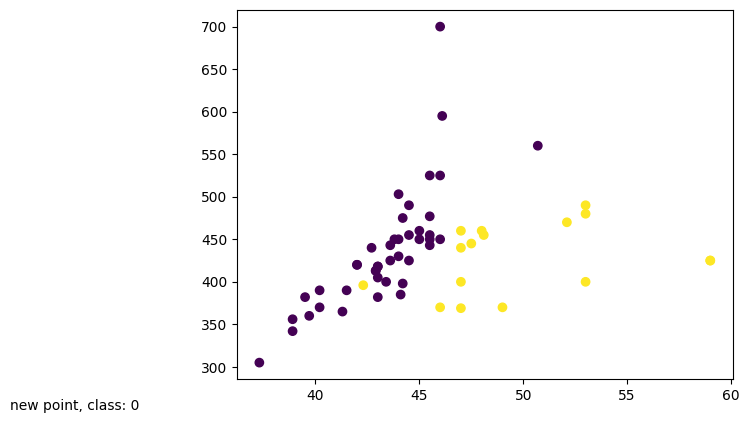

In [68]:
#fit knn with k=5

from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

test_new_x = 27
test_new_y = 250
new_point = [(test_new_x, test_new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [test_new_x], y + [test_new_y], c=classes + [prediction[0]])
plt.text(x=test_new_x-1.7, y=test_new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()




Accuracy: 0.8333333333333334


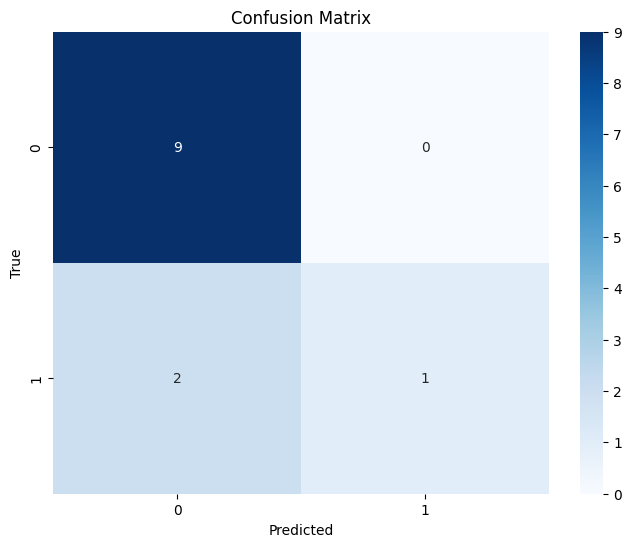

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset
file_path='/content/drive/MyDrive/Colab Notebooks/LAB/cars_clus.csv'
df = pd.read_csv(file_path)

# Extract the features 'fuel_cap' and 'horsepow'
X = df[['fuel_cap', 'horsepow']]
y = df['type']

# Split the data into a training and testing set with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict the classes on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate and print the accuracy of the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
